In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = np.array([[ 1.658985,  4.285136],
       [-3.453687,  3.424321],
       [ 4.838138, -1.151539],
       [-5.379713, -3.362104],
       [ 0.972564,  2.924086],
       [-3.567919,  1.531611],
       [ 0.450614, -3.302219],
       [-3.487105, -1.724432],
       [ 2.668759,  1.594842],
       [-3.156485,  3.191137],
       [ 3.165506, -3.999838],
       [-2.786837, -3.099354],
       [ 4.208187,  2.984927],
       [-2.123337,  2.943366],
       [ 0.704199, -0.479481],
       [-0.39237 , -3.963704],
       [ 2.831667,  1.574018],
       [-0.790153,  3.343144],
       [ 2.943496, -3.357075],
       [-3.195883, -2.283926],
       [ 2.336445,  2.875106],
       [-1.786345,  2.554248],
       [ 2.190101, -1.90602 ],
       [-3.403367, -2.778288],
       [ 1.778124,  3.880832],
       [-1.688346,  2.230267],
       [ 2.592976, -2.054368],
       [-4.007257, -3.207066],
       [ 2.257734,  3.387564],
       [-2.679011,  0.785119],
       [ 0.939512, -4.023563],
       [-3.674424, -2.261084],
       [ 2.046259,  2.735279],
       [-3.18947 ,  1.780269],
       [ 4.372646, -0.822248],
       [-2.579316, -3.497576],
       [ 1.889034,  5.1904  ],
       [-0.798747,  2.185588],
       [ 2.83652 , -2.658556],
       [-3.837877, -3.253815],
       [ 2.096701,  3.886007],
       [-2.709034,  2.923887],
       [ 3.367037, -3.184789],
       [-2.121479, -4.232586],
       [ 2.329546,  3.179764],
       [-3.284816,  3.273099],
       [ 3.091414, -3.815232],
       [-3.762093, -2.432191],
       [ 3.542056,  2.778832],
       [-1.736822,  4.241041],
       [ 2.127073, -2.98368 ],
       [-4.323818, -3.938116],
       [ 3.792121,  5.135768],
       [-4.786473,  3.358547],
       [ 2.624081, -3.260715],
       [-4.009299, -2.978115],
       [ 2.493525,  1.96371 ],
       [-2.513661,  2.642162],
       [ 1.864375, -3.176309],
       [-3.171184, -3.572452],
       [ 2.89422 ,  2.489128],
       [-2.562539,  2.884438],
       [ 3.491078, -3.947487],
       [-2.565729, -2.012114],
       [ 3.332948,  3.983102],
       [-1.616805,  3.573188],
       [ 2.280615, -2.559444],
       [-2.651229, -3.103198],
       [ 2.321395,  3.154987],
       [-1.685703,  2.939697],
       [ 3.031012, -3.620252],
       [-4.599622, -2.185829],
       [ 4.196223,  1.126677],
       [-2.133863,  3.093686],
       [ 4.668892, -2.562705],
       [-2.793241, -2.149706],
       [ 2.884105,  3.043438],
       [-2.967647,  2.848696],
       [ 4.479332, -1.764772],
       [-4.905566, -2.91107 ]])

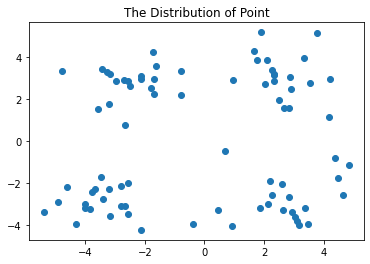

In [3]:
# 예제 데이터셋 시각화
plt.title("The Distribution of Point")
plt.scatter(dataset[:,0],dataset[:,1])
plt.show()

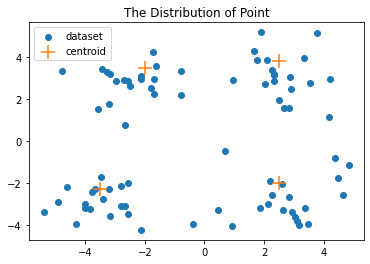

In [4]:
# 예제 데이터셋 시각화
plt.title("The Distribution of Point")
plt.scatter(dataset[:,0],dataset[:,1],label='dataset')
plt.scatter([-3.5,-2,2.5,2.5],[-2.3,3.5,3.8,-2],
            s=200, label="centroid", marker='+')
plt.legend()
plt.show()

In [5]:
center_x = np.random.rand(4) * 10 - 5
center_y = np.random.rand(4) * 10 - 5
centroids = np.stack([center_x,center_y],axis=-1)

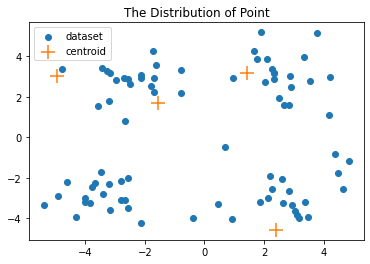

In [6]:
# 예제 데이터셋 시각화

plt.title("The Distribution of Point")
plt.scatter(dataset[:,0],dataset[:,1],label='dataset')
plt.scatter(centroids[:,0],centroids[:,1],
            s=200, label="centroid", marker='+')
plt.legend()
plt.show()

In [7]:
## numpy broadcasting 을 활용해 코드 한줄로 모든 centroids 와 모든 데이터간 거리를 계산하세요. 
#dists = dataset - np.column_stack((center_x, center_y))
dists = np.array([[ np.linalg.norm(i-j) for j in centroids] for i in dataset]).T

In [8]:
dists.shape

(4, 80)

In [9]:
cluster_per_point = np.argmin(dists, axis=0)

In [10]:
# 각 군집별로 순회
k = 4 
for i in range(k):
    
    # 각 군집에 해당하는 데이터들을 가져옵니다. 
    target_point = [dataset[[j for j in range(0, 80) if cluster_per_point[j] == i]].sum(axis=0)]
    # 각 군집의 평균을 계산해 centroids 에 할당 합니다. 
    centroids[i] = target_point / np.unique(cluster_per_point , return_counts=True)[1][i]
    

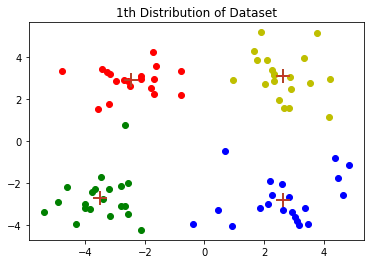

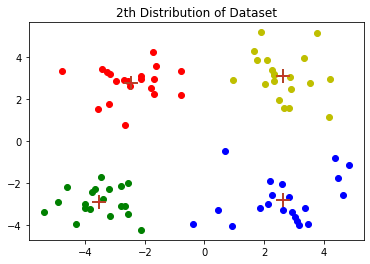

In [11]:
num_data = dataset.shape[0]

cluster_per_point = np.ones((num_data))

counter = 0
while True:
    prev_cluster_per_point = cluster_per_point
    
    # (2) 중심점과 각 데이터 사이의 거리를 계산
    dists = np.array([[ np.linalg.norm(i-j) for j in centroids] for i in dataset]).T
    
    # (3) 각 데이터를 거리가 가장 가까운 군집으로 할당
    cluster_per_point = np.argmin(dists, axis=0)
    
    # (4) 각 군집 별 점들의 평균을 계산 후, 군집의 중심점을 다시 계산
    k = 4 
    for i in range(k):
    
        target_point = [dataset[[j for j in range(0, 80) if cluster_per_point[j] == i]].sum(axis=0)]
    
        centroids[i] = target_point / np.unique(cluster_per_point , return_counts=True)[1][i]       
    
    ## (5) cluster 값이 변하지 않으면 while 구문을 종료(np.all 구문 사용)
    if (prev_cluster_per_point == cluster_per_point).min():
        break
        
    # 시각화 코드 
    counter += 1
    plt.title("{}th Distribution of Dataset".format(counter))
    for idx, color in enumerate(['r','g','b','y']):
        mask = (cluster_per_point==idx)
        plt.scatter(dataset[mask,0],dataset[mask,1],
                    label='dataset', c=color)
        plt.scatter(centroids[:,0],centroids[:,1],
                    s=200, label="centroid", marker='+')
    plt.show()

In [31]:
def cluster_kmeans(dataset, k):
    num_data = dataset.shape[0]

    center_x = np.random.rand(k) * 10 - 5
    center_y = np.random.rand(k) * 10 - 5
    centroids = np.stack([center_x,center_y],axis=-1)

    cluster_per_point = np.ones((num_data))

    counter = 0
    while True:
        prev_cluster_per_point = cluster_per_point

        # (2) 중심점과 각 데이터 사이의 거리를 계산
        dists = np.array([[ np.linalg.norm(i-j) for j in centroids] for i in dataset]).T
        # (3) 각 데이터를 거리가 가장 가까운 군집으로 할당
        cluster_per_point = np.argmin(dists, axis=0)
        
        # (4) 각 군집 별 점들의 평균을 계산 후, 군집의 중심점을 다시 계산
        for i in range(k):

            target_point = [dataset[[j for j in range(0, 80) if cluster_per_point[j] == i]].sum(axis=0)]
            centroids[i] = target_point / np.unique(cluster_per_point , return_counts=True)[1][i]

        print(centroids)
        ## (5) cluster 값이 변하지 않으면 while 구문을 종료(np.all 구문 사용)
        if (prev_cluster_per_point == cluster_per_point).min():
            break

        # 시각화 코드 
        counter += 1
        plt.title("{}th Distribution of Dataset".format(counter))
        for idx, color in enumerate(['r','g','b','y','m', 'c', 'k']):
            mask = (cluster_per_point==idx)
            plt.scatter(dataset[mask,0],dataset[mask,1],
                        label='dataset', c=color)
            plt.scatter(centroids[:,0],centroids[:,1],
                        s=200, label="centroid", marker='+')
        plt.show()
    
    
    return centroids

[[ 2.56051169 -3.26127125]
 [ 2.71358074  3.11839563]
 [-1.88403267 -2.59882605]
 [-2.552108    2.16042775]]


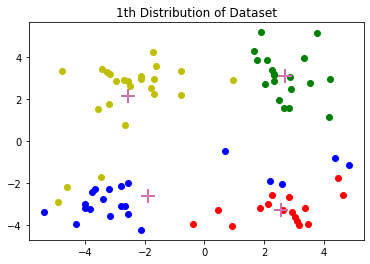

[[ 2.80293085 -2.7315146 ]
 [ 2.6265299   3.10868015]
 [-3.38237045 -2.9473363 ]
 [-2.46154315  2.78737555]]


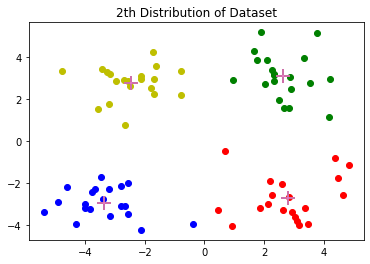

[[ 2.80293085 -2.7315146 ]
 [ 2.6265299   3.10868015]
 [-3.38237045 -2.9473363 ]
 [-2.46154315  2.78737555]]


array([[ 2.80293085, -2.7315146 ],
       [ 2.6265299 ,  3.10868015],
       [-3.38237045, -2.9473363 ],
       [-2.46154315,  2.78737555]])

In [32]:
cluster_kmeans(dataset,4)

[[-2.68476758  3.22459192]
 [-0.20544533  2.817606  ]
 [ 2.71358074  3.11839563]
 [-3.51600089 -1.26010874]
 [ 1.47372122 -2.89301022]]


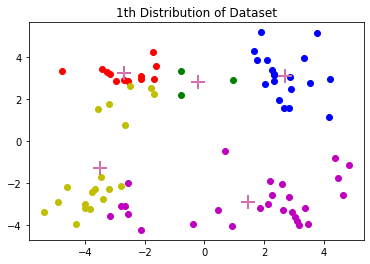

[[-2.64487953  2.90786235]
 [-0.20544533  2.817606  ]
 [ 2.71358074  3.11839563]
 [-3.4967025  -2.70989515]
 [ 2.65077367 -2.79019029]]


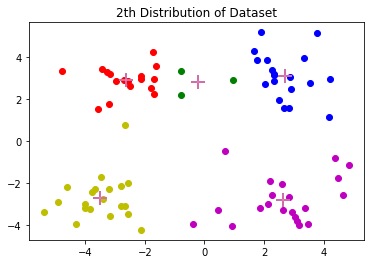

[[-2.64677572  2.78993217]
 [-0.20544533  2.817606  ]
 [ 2.71358074  3.11839563]
 [-3.53973889 -2.89384326]
 [ 2.65077367 -2.79019029]]


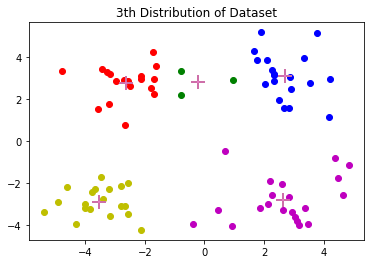

[[-2.64677572  2.78993217]
 [-0.20544533  2.817606  ]
 [ 2.71358074  3.11839563]
 [-3.53973889 -2.89384326]
 [ 2.65077367 -2.79019029]]


array([[-2.64677572,  2.78993217],
       [-0.20544533,  2.817606  ],
       [ 2.71358074,  3.11839563],
       [-3.53973889, -2.89384326],
       [ 2.65077367, -2.79019029]])

In [33]:
cluster_kmeans(dataset,5)